# Customer Service Requests Analysis project 1 python

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [10]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [24]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

## Droping unwanted columns

In [29]:
df = df.drop(['Landmark','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis= 1)

In [50]:
df['Intersection Street 1'].value_counts()

BROADWAY             757
170 STREET           506
6 AVENUE             379
44 STREET            362
EAST   46 STREET     347
                    ... 
RETFORD AVENUE         1
OCEAN VIEW AVENUE      1
Astoria Blvd           1
169 PLACE              1
CORTLANDT STREET       1
Name: Intersection Street 1, Length: 4704, dtype: int64

In [60]:
un_useble= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type']


In [63]:
to_remove= ['School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Landmark']

In [68]:
new_del = []
for i in un_useble:
    if i in to_remove:
        un_useble.remove(i)
    else:
        new_del.append(i)
    

In [59]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [69]:
new_del

['Agency Name',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Due Date',
 'Resolution Action Updated Date',
 'Community Board',
 'Facility Type']

In [73]:
df = df.drop(new_del,axis=1)

In [74]:
df.shape

(364558, 15)

In [76]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## what percentage of null values in dataset

In [83]:
df.isnull().sum()/len(df)*100

Unique Key                0.000000
Created Date              0.000000
Closed Date               0.653120
Agency                    0.000000
Complaint Type            0.000000
Descriptor                1.783255
Location Type             0.036483
Incident Zip              0.822366
City                      0.822091
Status                    0.000000
Resolution Description    0.000000
Borough                   0.000000
Latitude                  1.105448
Longitude                 1.105448
Location                  1.105448
dtype: float64

In [103]:
df.isna().sum()

Unique Key                 0
Created Date               0
Closed Date                0
Agency                     0
Complaint Type             0
Descriptor                 0
Location Type             55
Incident Zip              40
City                      40
Resolution Description     0
Borough                    0
Latitude                   0
Longitude                  0
Location                   0
dtype: int64

In [92]:
df['Status'].value_counts()
#hr1=hr1[(hr1['Latitude'].notnull())&(hr1['Longitude'].notnull()) & (hr1['Descriptor'].notnull())]
#hr1 = hr1[hr1['Status']=='Closed']
#hr1.drop(['Status'],inplace=True, axis=1)
#hr1.info()


Closed      362114
Open          1640
Assigned       802
Draft            2
Name: Status, dtype: int64

In [93]:
df=df[(df['Latitude'].notnull())&(df['Longitude'].notnull()) & (df['Descriptor'].notnull())]

In [95]:
df.shape

(354103, 15)

In [98]:
df = df[df['Status']=='Closed']

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,WOODHAVEN,Closed,The Police Department responded to the complai...,QUEENS,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NEW YORK,Closed,The Police Department responded to the complai...,MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10466.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [101]:
df.drop(['Status'],inplace=True, axis=1)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353988 entries, 0 to 364557
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              353988 non-null  int64         
 1   Created Date            353988 non-null  datetime64[ns]
 2   Closed Date             353988 non-null  datetime64[ns]
 3   Agency                  353988 non-null  object        
 4   Complaint Type          353988 non-null  object        
 5   Descriptor              353988 non-null  object        
 6   Location Type           353933 non-null  object        
 7   Incident Zip            353948 non-null  float64       
 8   City                    353948 non-null  object        
 9   Resolution Description  353988 non-null  object        
 10  Borough                 353988 non-null  object        
 11  Latitude                353988 non-null  float64       
 12  Longitude               353988

In [104]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [106]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [108]:
df['Case_request_time'] = df['Closed Date'] - df['Created Date']

In [113]:
df['Case_request_time']

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: Case_request_time, Length: 353988, dtype: timedelta64[ns]

In [114]:
df.isnull().sum()/len(df)*100

Unique Key                0.000000
Created Date              0.000000
Closed Date               0.000000
Agency                    0.000000
Complaint Type            0.000000
Descriptor                0.000000
Location Type             0.015537
Incident Zip              0.011300
City                      0.011300
Resolution Description    0.000000
Borough                   0.000000
Latitude                  0.000000
Longitude                 0.000000
Location                  0.000000
Case_request_time         0.000000
dtype: float64

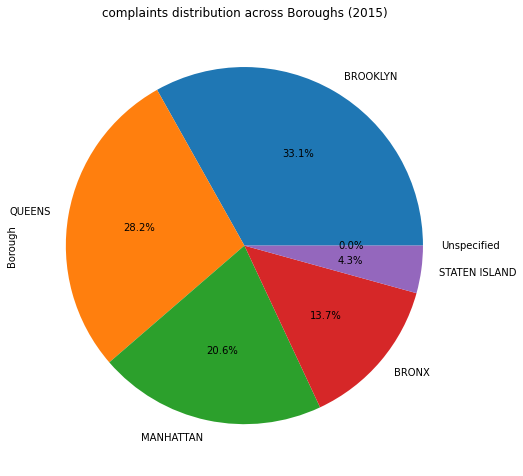

In [137]:
df['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize = (8,12))
plt.title('complaints distribution across Boroughs (2015)')
plt.show()


In [138]:
df['Case_request_time']

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: Case_request_time, Length: 353988, dtype: timedelta64[ns]

In [147]:
df['Case_request_hours'] = df['Case_request_time'].astype('timedelta64[h]')+1


In [149]:
df[['Case_request_hours','Case_request_time']].head()

,Case_request_hours,Case_request_time
0,1.0,0 days 00:55:30
1,2.0,0 days 01:27:13
2,5.0,0 days 04:51:34
3,8.0,0 days 07:45:27
4,4.0,0 days 03:27:44


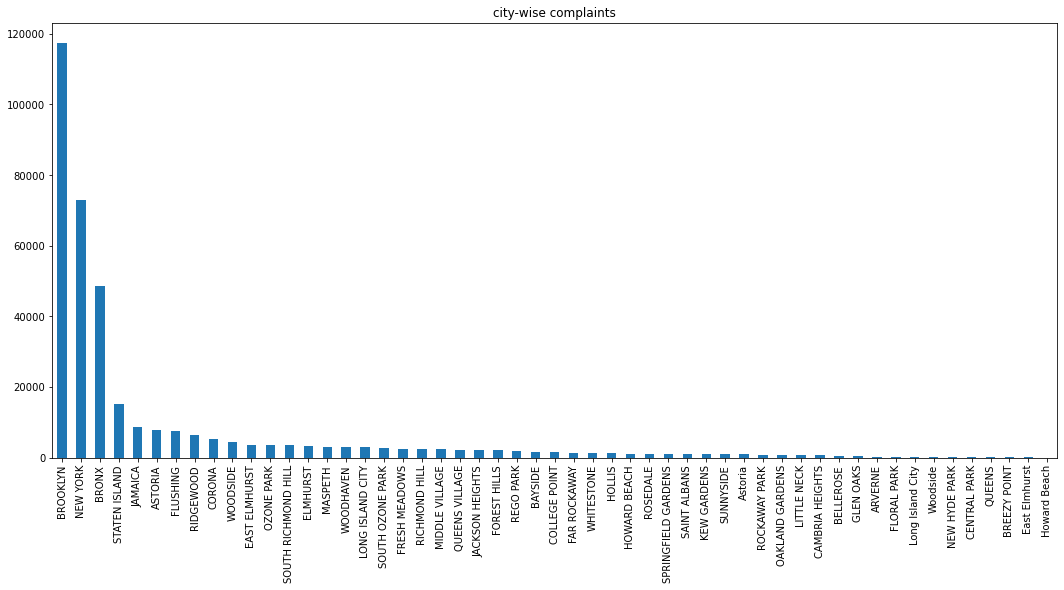

In [162]:
df['City'].value_counts().plot(kind = 'bar', figsize = (18,8))
plt.title("city-wise complaints")
plt.show()

## grouping complaint type and borough based on Request Closing Hour

In [205]:
df_grouped = df.groupby(['Complaint Type','Borough'])['Case_request_hours'].agg('mean').unstack()

In [206]:
df_grouped

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Complaint Type,,,,,,
Animal Abuse,7.512456,5.144427,4.049844,5.639742,5.173028,NaN
Blocked Driveway,6.358027,4.723279,3.922247,4.805411,4.394163,NaN
Derelict Vehicle,9.240517,6.193724,4.542940,8.648976,5.339752,NaN
Disorderly Youth,4.696970,4.531646,2.750000,3.765625,4.240000,NaN
Drinking,6.199029,4.103093,3.546875,4.291139,4.101064,NaN
Graffiti,8.066667,7.383333,5.280000,7.078431,6.333333,NaN
Illegal Parking,6.721534,4.618611,3.807848,5.088832,4.278617,5.0
Noise - Commercial,5.090445,3.479203,3.204679,4.133342,3.445153,NaN
Noise - House of Worship,4.966667,3.609819,2.760369,4.051576,3.222222,NaN


In [199]:
df['Complaint Type'].value_counts()

Blocked Driveway            100476
Illegal Parking              91078
Noise - Street/Sidewalk      50815
Noise - Commercial           43638
Derelict Vehicle             21424
Noise - Vehicle              19124
Animal Abuse                 10501
Traffic                       5166
Vending                       4162
Noise - Park                  3994
Drinking                      1400
Noise - House of Worship      1061
Posting Advertisement          678
Disorderly Youth               314
Graffiti                       157
Name: Complaint Type, dtype: int64

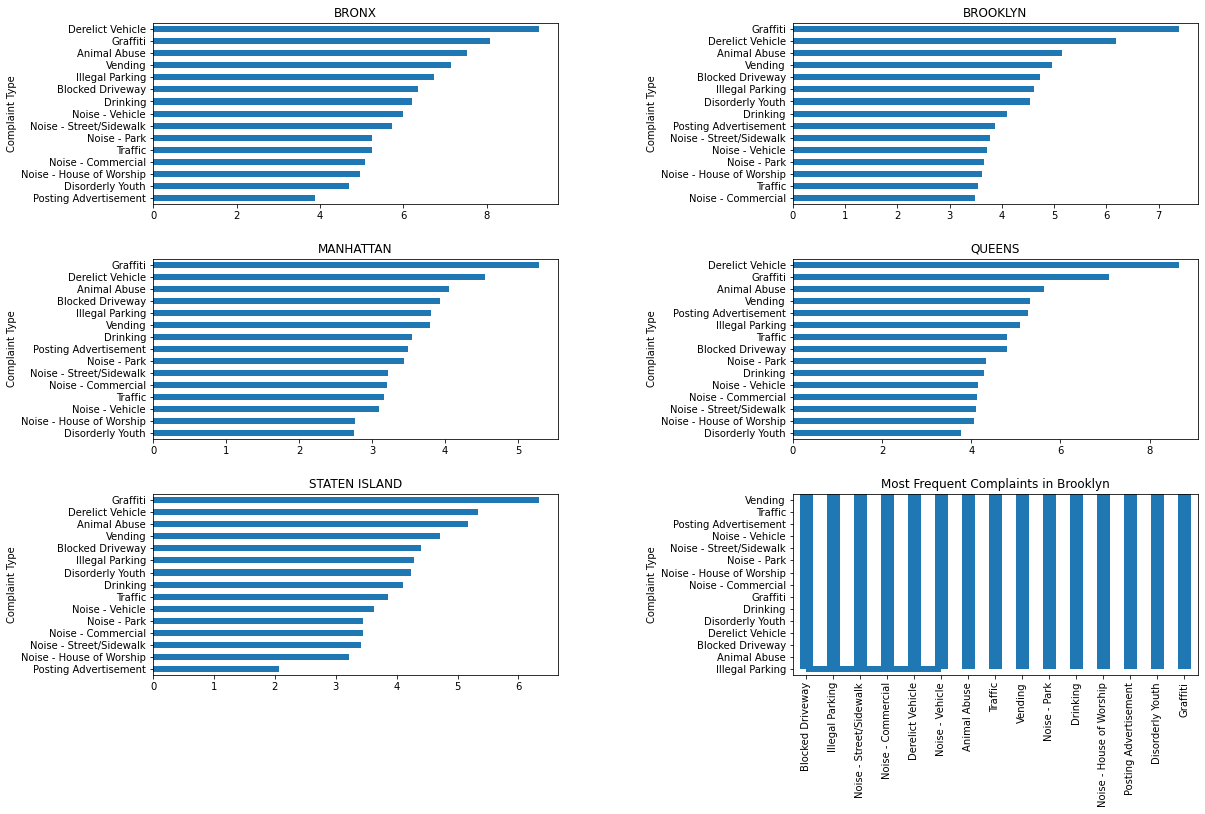

In [269]:
fig, axes = plt.subplots(3,2, figsize=(12,8))

for i, (label,col) in enumerate(df_grouped.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()
(df['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(18,10),title = 'Most Frequent Complaints in Brooklyn')
plt.show()


## complain type distribution along brooklyn city

In [302]:
x = df_BROOKLYN['Complaint Type']

In [303]:
df_BROOKLYN = df.loc[df['Borough'] =='BROOKLYN']

In [304]:
y = df_BROOKLYN['Complaint Type'].value_counts()

<AxesSubplot:>

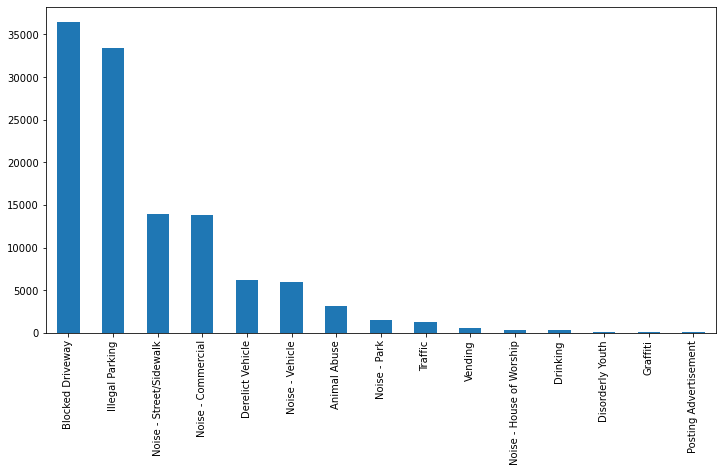

In [333]:
y.plot(kind='bar', figsize = (12,6))


## Find major types of complaints

<AxesSubplot:xlabel='Complaint Type', ylabel='count'>

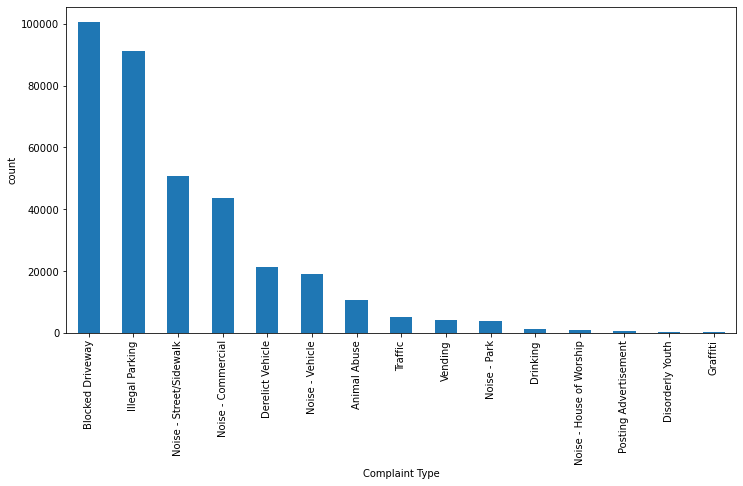

In [343]:
df['Complaint Type'].value_counts().plot(kind= 'bar' , figsize = (12,6),xlabel = "Complaint Type" , ylabel = "count")

In [353]:
df['Complaint Type'].value_counts().sort_values(ascending= False).nlargest(10)

Blocked Driveway           100476
Illegal Parking             91078
Noise - Street/Sidewalk     50815
Noise - Commercial          43638
Derelict Vehicle            21424
Noise - Vehicle             19124
Animal Abuse                10501
Traffic                      5166
Vending                      4162
Noise - Park                 3994
Name: Complaint Type, dtype: int64

## types of complaints in each city in a separate dataset

In [356]:
cities = df['City'].unique()

In [360]:
cities

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', nan, 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [383]:
(df.loc[df['City']== 'i'])['Complaint Type'].unique()


array(['Illegal Parking', 'Blocked Driveway', 'Noise - Commercial',
       'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Traffic',
       'Derelict Vehicle', 'Animal Abuse', 'Drinking', 'Vending',
       'Noise - Park', 'Posting Advertisement', 'Graffiti',
       'Noise - House of Worship', 'Disorderly Youth'], dtype=object)

In [408]:
c_types = []
for i in cities:
    c_types.append((df.loc[df['City']== i])['Complaint Type'].unique())
    

In [411]:
c_types

[array(['Noise - Street/Sidewalk', 'Illegal Parking',
        'Noise - House of Worship', 'Noise - Commercial',
        'Blocked Driveway', 'Vending', 'Noise - Vehicle', 'Animal Abuse',
        'Noise - Park', 'Traffic', 'Derelict Vehicle', 'Drinking',
        'Graffiti', 'Posting Advertisement', 'Disorderly Youth'],
       dtype=object),
 array(['Blocked Driveway', 'Noise - Commercial', 'Noise - Vehicle',
        'Illegal Parking', 'Noise - Street/Sidewalk', 'Animal Abuse',
        'Derelict Vehicle', 'Drinking', 'Traffic',
        'Noise - House of Worship', 'Vending', 'Noise - Park',
        'Disorderly Youth', 'Graffiti', 'Posting Advertisement'],
       dtype=object),
 array(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
        'Noise - Vehicle', 'Noise - Commercial', 'Derelict Vehicle',
        'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park',
        'Noise - House of Worship', 'Disorderly Youth', 'Graffiti',
        'Posting Advertisement'],

In [415]:
r = []
for q in c_types:
    r.append(q)
    

In [427]:
new_df_citywise_complains = pd.DataFrame({'Name_of_city': cities, 'Complain_types': r})

In [428]:
new_df_citywise_complains

,Name_of_city,Complain_types
0,NEW YORK,"[Noise - Street/Sidewalk, Illegal Parking, Noi..."
1,ASTORIA,"[Blocked Driveway, Noise - Commercial, Noise -..."
2,BRONX,"[Blocked Driveway, Illegal Parking, Noise - St..."
3,ELMHURST,"[Illegal Parking, Blocked Driveway, Noise - Ve..."
4,BROOKLYN,"[Illegal Parking, Blocked Driveway, Noise - Co..."
5,KEW GARDENS,"[Illegal Parking, Animal Abuse, Blocked Drivew..."
6,JACKSON HEIGHTS,"[Blocked Driveway, Noise - House of Worship, N..."
7,MIDDLE VILLAGE,"[Derelict Vehicle, Illegal Parking, Blocked Dr..."
8,REGO PARK,"[Blocked Driveway, Derelict Vehicle, Illegal P..."
9,SAINT ALBANS,"[Blocked Driveway, Illegal Parking, Derelict V..."


In [469]:
crosstab = pd.crosstab(index=df['City'], columns=df['Complaint Type'])

<AxesSubplot:xlabel='City'>

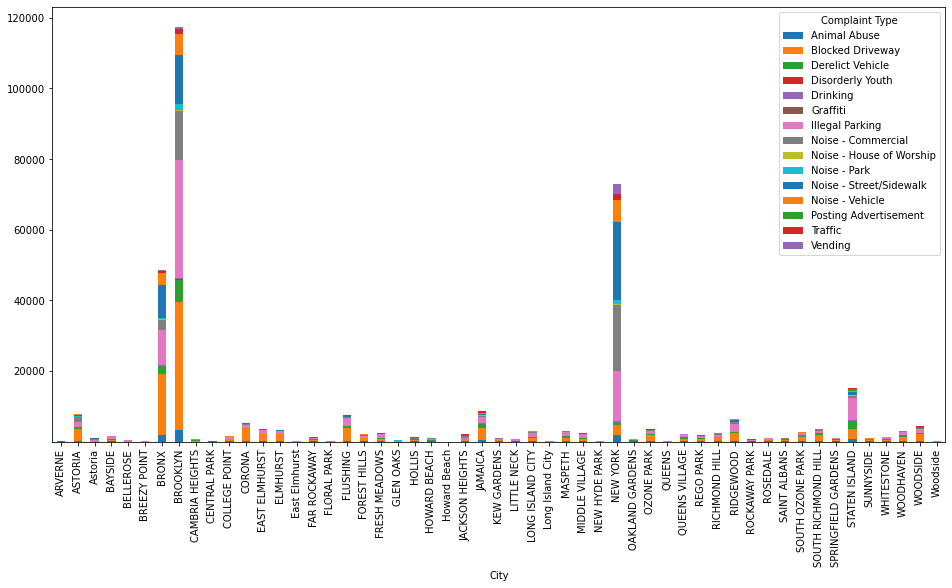

In [474]:
crosstab.plot(kind = 'bar' , stacked = True , figsize  = (16,8))

## average response time across various types of complaints

In [487]:
avg_casewise_response = df.groupby(df['Complaint Type'])['Case_request_hours'].agg('mean')

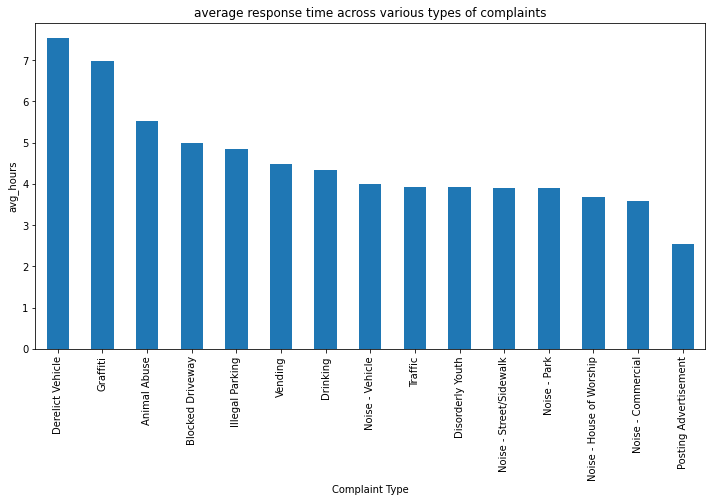

In [496]:
avg_casewise_response.sort_values(ascending=False).plot(kind = 'bar', figsize = (12,6), 
                                                        title = "average response time across various types of complaints"
                                                       , ylabel = "avg_hours")
plt.show()

In [505]:
from scipy import stats

In [510]:
alfa_value = 0.05
complaints= df['Complaint Type'].value_counts().index
for i in range(len(complaints)):
    exec("sample{}= df.loc[(df['Complaint Type'] == '{}') , 'Case_request_hours']".format(i+1,complaints[i]))

In [511]:
fscore,pvalue= stats.f_oneway(sample1,sample2,sample3,sample4,sample5,sample6,
                              sample7,sample8,sample9,sample10,sample11,sample12,sample13,sample14,sample15)
print("score :{:.2f}, pvalue :{:.2f}".format(fscore,pvalue))

score :637.57, pvalue :0.00
